
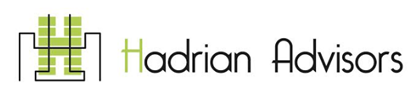 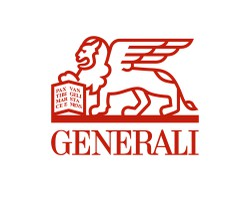


# Life Insurance usecase

# Python Functions <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> for data preparation and variable selection on a Life Insurance dataset 


## Introduction
### Data

Num| Name |	Values
-|--|--|--
1|`Id`|	int
2|	`Product_Info_1`|	real
3|	`Product_Info_2`|	'D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3','A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'
4|	`Product_Info_3`|	integer
5|	`Product_Info_4`|	real
6|	`Product_Info_5`|	integer 2, 3
7|	`Product_Info_6`|	integer 1, 3
8|	`Product_Info_7`|	integer 1, 2, 3
9|	`Ins_Age`|	real
10|	`Ht`|	real
11|	`Wt`|	real  
12|	`BMI`|	real
-|--|--|--
13|	`Medical_Keyword_`|	int 1/0
14|	`Response`|	integer 1 -> 8


## 1 Data Preparation
### 1.1 Read  CSV

Load the [data] in the current path (`path=""`) or directly execute the cell.

In [1]:
# install via conda instead

#!pip install seaborn
#!pip install fancyimpute

    100% |████████████████████████████████| 184kB 3.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/bunten/.cache/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn
Exception:
Traceback (most recent call last):
  File "/usr/lib/python2.7/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python2.7/site-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/lib/python2.7/site-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/lib/python2.7/site-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/lib/python2.7/site-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/usr/lib/python2.7/site-packages/pip/wheel.py", line 345, in move_wheel_f

In [2]:
%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import numpy as np

path=""
datBase=pd.read_csv(path+'trainCourse.csv')
print(datBase.head())

## We drop the Id variable, as it contains as many different values as the number of rows.
datBase.drop(['Id'],axis=1,inplace=True)


/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


      Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0  75573               1             D3              26        0.487179   
1    414               1             D3              26        0.487179   
2  36755               1             D4              26        1.000000   
3  71747               1             D2              26        0.897436   
4  14523               1             E1              26        0.282051   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.253731  0.763636   
1               2               3               1  0.194030  0.763636   
2               2               1               1  0.268657  0.690909   
3               2               3               1  0.537313  0.781818   
4               2               1               1  0.432836  0.818182   

     ...     Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0    ...                      0    

### 1.2 Exploration

In [5]:
datBase.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,...,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000
mean,1.026271,24.534187,0.331447,2.006399,2.684742,1.046817,0.406994,0.707906,0.295191,0.473208,...,0.061637,0.011283,0.046817,0.010273,0.007915,0.013304,0.008926,0.016335,0.053722,0.747727
std,0.159955,4.900897,0.283566,0.079747,0.728847,0.302420,0.197635,0.074145,0.089481,0.121807,...,0.240515,0.105631,0.211265,0.100841,0.088622,0.114583,0.094061,0.126773,0.225487,0.434354
min,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.400000,0.069038,0.058838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.232218,0.390578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.457590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.351464,0.534355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,0.925373,0.963636,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# missing data
datBase.count().transpose()

Product_Info_1         5938
Product_Info_2         5938
Product_Info_3         5938
Product_Info_4         5938
Product_Info_5         5938
Product_Info_6         5938
Product_Info_7         5938
Ins_Age                5938
Ht                     5938
Wt                     5938
BMI                    5938
Employment_Info_1      5938
Employment_Info_2      5938
Employment_Info_3      5938
Employment_Info_4      5251
Employment_Info_5      5938
Employment_Info_6      4860
InsuredInfo_1          5938
InsuredInfo_2          5938
InsuredInfo_3          5938
InsuredInfo_4          5938
InsuredInfo_5          5938
InsuredInfo_6          5938
InsuredInfo_7          5938
Insurance_History_1    5938
Insurance_History_2    5938
Insurance_History_3    5938
Insurance_History_4    5938
Insurance_History_5    3386
Insurance_History_7    5938
                       ... 
Medical_Keyword_20     5938
Medical_Keyword_21     5938
Medical_Keyword_22     5938
Medical_Keyword_23     5938
Medical_Keyword_24  

In [7]:
datBase["Response"].value_counts()

1    4440
0    1498
Name: Response, dtype: int64

In [8]:
# Output variable
Y=datBase["Response"]
# Predictive variables
X=datBase.drop(["Response"],axis=1)

### 1.4  Sampling and Imputing

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=500,random_state=11)
Labels = X.columns
yName = Y.name

### 1.3 Dummy variables


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
mbin = MultiLabelBinarizer().fit(X_train[["Product_Info_2"]].values)
X_train_dum = mbin.transform(X_train[["Product_Info_2"]].values)
X_test_dum = mbin.transform(X_test[["Product_Info_2"]].values)

X_train_dum = pd.DataFrame(X_train_dum, index = X_train.index)
X_test_dum = pd.DataFrame(X_test_dum, index = X_test.index)

In [11]:
X_train_dum.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
X_train_dum.columns = ['Product_Info_2_' + c for c in mbin.classes_]
X_test_dum.columns = ['Product_Info_2_' + c for c in mbin.classes_]
X_train_dum.head()

,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
2089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
datBaseDum=pd.get_dummies(datBase[["Product_Info_2"]])
datBaseDum.head()

,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
X_train = X_train.join(X_train_dum)
X_test = X_test.join(X_test_dum)
X_train.drop('Product_Info_2',axis=1,inplace=True)
X_test.drop('Product_Info_2',axis=1,inplace=True)
X_train.head()

Labels = X_train.columns

ValueError: columns overlap but no suffix specified: Index(['Product_Info_2_A1', 'Product_Info_2_A2', 'Product_Info_2_A3',
       'Product_Info_2_A4', 'Product_Info_2_A5', 'Product_Info_2_A6',
       'Product_Info_2_A7', 'Product_Info_2_A8', 'Product_Info_2_B1',
       'Product_Info_2_B2', 'Product_Info_2_C1', 'Product_Info_2_C2',
       'Product_Info_2_C3', 'Product_Info_2_C4', 'Product_Info_2_D1',
       'Product_Info_2_D2', 'Product_Info_2_D3', 'Product_Info_2_D4',
       'Product_Info_2_E1'],
      dtype='object')

In [21]:
Labels

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Product_Info_2_B2', 'Product_Info_2_C1', 'Product_Info_2_C2',
       'Product_Info_2_C3', 'Product_Info_2_C4', 'Product_Info_2_D1',
       'Product_Info_2_D2', 'Product_Info_2_D3', 'Product_Info_2_D4',
       'Product_Info_2_E1'],
      dtype='object', length=144)

### Python Fancy Impute :
A variety of matrix completion and imputation algorithms implemented in Python.
#### Algorithms :

KNN

SoftImpute

SimpleFill

### Sklearn Imputer
Fast and classic Imputation transformer for completing missing values.

In [24]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan,strategy="mean",axis=0).fit(X_train)
X_filled_mean_train = imp.transform(X_train)
X_filled_mean_test = imp.transform(X_test)
#Y_train = Y_train.values.copy()
Y_train = Y_train.copy()
#Y_test = Y_test.values.copy()
Y_test = Y_test.copy()

### Scaling the data :


In [25]:
X_train = X_filled_mean_train.copy()
X_test = X_filled_mean_test.copy()

It can be very interesting to look at the *distribution* of our variables, comparing them to the *output variable*.

Here we plot it using the seaborn library.

#### a) Normalizing by the range of the data

In [26]:
X_train2 = (X_train - np.min(X_train,axis=0)) / (np.max(X_train,axis=0) - np.min(X_train,axis=0))
X_test2 = (X_test - np.min(X_train,axis=0)) / (np.max(X_train,axis=0) - np.min(X_train,axis=0))

#### b) StandardScaler : Standardize features by removing the mean and scaling to unit variance

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_train2 = X_train2 + np.abs(np.min(X_train2,axis=0))
X_test2 = scaler.transform(X_test)
X_test2 = X_test2 + np.abs(np.min(X_test2,axis=0))

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

## 2 Feature Selection


** Exercice ** :
Complete the function below, by fitting a RandomForest model for classification on *X_train* and *Y_train*, for the selected features *ListSelectFeatures* in *Labels*, and predict on *X_test*.

In [29]:
def modelfit(X_train,Y_train,X_test,Y_test,ListSelectFeatures,Labels):
    """
    Computes the 200-trees RandomForest fitted model on Y_train using the selected features.
    Then predicts on X_test.
    
    Arguments:
    X_train -- learning set
    Y_train -- learning output
    X_test -- test set
    Y_test -- test output
    ListSelectFeatures -- list of selected features
    Labels -- names of the features
    
    Returns:
    pred -- prediction vector
    MSE -- mean squared error
    R2 -- R2 score
    
    NB :
    model = RFModel.fit(X_train,Y_train)
    pred = model.predict(X_test)
    """
    
    IdLabels = np.in1d(Labels,ListSelectFeatures).nonzero()[0]
    ####################### START YOUR CODE HERE (approximately two lines) ##########################################
    model = RandomForestClassifier(n_estimators=200).fit(X_train[:,IdLabels],Y_train)
    pred = model.predict(X_test[:,IdLabels])
    ####################### END OF THE CODE ############################################
    print
    print("MSE=",mean_squared_error(pred,Y_test))
    print("R2=",r2_score(Y_test,pred))
    return pred,mean_squared_error(pred,Y_test), r2_score(Y_test,pred)

Dummy example :

In [30]:
## Example

LabelsRand = range(50)
matRand_Train = np.array([[1.0] * 30 + [0.0] * 20] * 50 + [[1.0] * 30 + [0.0] * 20] * 50)
yRand_Train = np.array([1] * 50 + [0] * 50)
matRand_Test = np.array([[0.0] * 25 + [1.0] * 25] * 40)
yRand_Test = np.array([0] * 20 + [0] * 20)
print(matRand_Train.shape)
ListSelectFeatures = range(20)

(100, 50)


In [32]:
modelfit(matRand_Train,yRand_Train,matRand_Test,yRand_Test,range(15),LabelsRand);

MSE= 0.0
R2= 1.0


**Expected output**
<table> 
    <tr>
    <td>
    ('MSE=', 0.0)
    </td>
    <td>
    ('R2=', 1.0)
    </td>
    
    </tr>

</table> 

### 2.1 Filter Methods

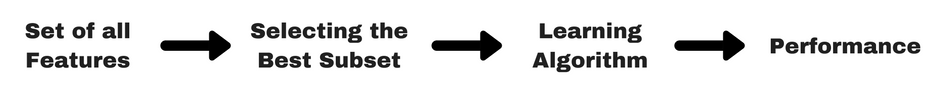
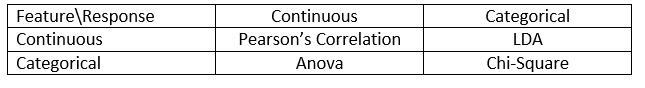

#### First let's import the library that computes the mutual information between the features and the output variable.

** Mutual information Formulation : **

Assume two lists of labels *X* and *Y*.
$$MI(X,Y) = \sum\limits_{i = 1}^{|X|}\sum\limits_{j = 1}^{|Y|} P(i,j)log(\frac{P(i,j)}{P(i)P'(j)})$$
$$ \text{where  } P(i) = |X_{i}| / N \text{  is the probability that an object picked at random from X falls into class  } X_{i} \text{  and   } P'(j) = |Y_{j}| / N $$

The normalized mutual information will then be :
$$ NMI(X,V) = \frac{MI(X,Y)}{\sqrt{H(X)H(Y)}} $$

$$ \text{where  } H(X) = - \sum\limits_{i = 1}^{|X|} P(i) log(P(i)) \text{  and  } H(Y) = - \sum\limits_{j = 1}^{|Y|} P'(j) log(P'(j)) $$

In [33]:
from sklearn.metrics.cluster import normalized_mutual_info_score

We can calculate each normalized mutual information.

** Exercice ** :
Complete the function below, by calculating the mutual information score on each feature of *X_train* and *Y_train*.

In [34]:
def ComputeMutualInfoScore(X_train,Y_train,Labels):
    """
    Computes the pairwise mutual information vetween each column of X_train and the column Y_train.
    
    Arguments:
    X_train -- learning set
    Y_train -- learning output
    Labels -- names of the features
    
    Returns:
    Mutual_info -- the table of the normalized mutual informations such as
    Mutual_Info[j] = Mutual_Info_Score(X_train[:,i],Y_train)
    """
    Mutual_info=[]
    
    for x_Train in X_train.T:
        ########################## START YOUR CODE HERE ##########################
        info=normalized_mutual_info_score(Y_train,x_Train)
      
        Mutual_info.append(info)
        ########################## END OF THE CODE ##########################

    Mutual_info=pd.DataFrame([Mutual_info],columns=Labels,index=['Mutual Info'])
    Mutual_info = Mutual_info.transpose()
    Mutual_info.sort_values('Mutual Info',ascending=False,inplace=True)
    return Mutual_info

In [35]:
TabMutualInfo = ComputeMutualInfoScore(X_train2,Y_train,Labels)

In [36]:
ListSelectedFeaturesMutualInfo = TabMutualInfo.loc[TabMutualInfo['Mutual Info'] > TabMutualInfo['Mutual Info'].median()].index
modelfit(X_train2,Y_train,X_test2,Y_test,ListSelectedFeaturesMutualInfo,Labels);

MSE= 0.206
R2= -0.123007479448


#### Pearson Correlation

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.

$$p_{X,Y} = \frac{cov(X,Y)}{sigma_{X}sigma_{Y}}$$

$$ \text{ where cov is the covariance,   }  sigma_{X} \text{  is the standard deviation of X and }  sigma_{Y} \text{  is the standard deviation of Y} $$

In [37]:
# Pearson Correlation
from scipy.stats import pearsonr

** Exercice **
Complete the function below, that computes the pearson correlation using pearsonr

In [38]:
def TabPearsonr(X_train,Y_train):
    """
    Computes the pearson correlation between each column of X_train and the column Y_train.
    
    Arguments:
    X_train -- learning set
    Y_train -- learning output
    Labels -- names of the features
    
    Returns:
    TabResultsPearson -- the table of the normalized mutual informations such as
    TabResultsPearson[j] = PearsonCorr(X_train[:,i],Y_train)
    """
    ListPearsonCorr = []
    for x_Train in X_train.T:
        ################### START YOUR CODE HERE ###################
        ListPearsonCorr.append(pearsonr(x_Train,Y_train))
        ################### END OF THE CODE ###################
    TabResultsPearson = pd.DataFrame(ListPearsonCorr,columns=['Pearson Correlation','P-Value'],index=Labels)
    TabResultsPearson = TabResultsPearson.transpose()
    return TabResultsPearson


In [39]:
TabResultsPearson = TabPearsonr(X_train2,Y_train)
TabResultsPearson

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
Pearson Correlation,-0.005418,-0.019802,1.679790e-01,0.003269,-0.018008,0.006663,-1.536466e-01,-0.056811,-2.201480e-01,-2.396819e-01,...,0.042188,-0.013014,-0.005267,0.022685,0.009883,-1.239218e-01,-0.046958,-0.025170,1.039397e-01,0.019282
P-Value,0.689580,0.144264,1.046521e-35,0.809523,0.184251,0.623265,4.405537e-30,0.000028,1.117757e-60,6.545138e-72,...,0.001860,0.337299,0.697784,0.094387,0.466199,4.660120e-20,0.000532,0.063453,1.543613e-14,0.155099


In [40]:
def SelectBestFeatures(TabResultsPearson,thresPVal=0.05):
    """
    Extracts the features that are correlated the most to Y_train and that the pValue is under thresPVal.
    
    Arguments:
    TabResultsPearson -- table of the correlations
    thresPVal -- pValue threshold
    
    Returns:
    ListSelectedFeatures -- List of selected features
    """
    
    IdxCols = (TabResultsPearson.ix['P-Value',:] < thresPVal).nonzero()[0]
    TabResultsPearsonLoc = TabResultsPearson.ix['Pearson Correlation',IdxCols]
    
    MAD = (TabResultsPearsonLoc.abs() \
           - TabResultsPearsonLoc.abs().median()).abs().median()
    ListSelectedFeatures = TabResultsPearsonLoc.loc[TabResultsPearsonLoc.abs() > TabResultsPearsonLoc.abs().median() + MAD]
    ListSelectedFeatures = ListSelectedFeatures.index
    ListSelectedFeatures = ListSelectedFeatures.values
    return ListSelectedFeatures

In [45]:
thresPVal = 0.05
ListSelectedFeatures = SelectBestFeatures(TabResultsPearson,thresPVal)
print
print("Selected Features: %s", ListSelectedFeatures)

Selected Features: %s ['Product_Info_4' 'Ins_Age' 'Wt' 'BMI' 'Employment_Info_3' 'InsuredInfo_5'
 'Medical_History_4' 'Medical_History_6' 'Medical_History_13'
 'Medical_History_15' 'Medical_History_16' 'Medical_History_23'
 'Medical_History_33' 'Medical_History_39' 'Medical_History_40'
 'Medical_Keyword_3' 'Medical_Keyword_15' 'Medical_Keyword_23'
 'Medical_Keyword_48' 'Product_Info_2_D1' 'Product_Info_2_D4']


In [44]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListSelectedFeatures,Labels);

MSE= 0.19
R2= -0.035783597549


### The '*Minimum Redundancy Maximum Relevance*' Method

Features are ranked by their correlations to the target vector. These relevance scores
are then integrated with correlations between features in order to obtain
a set of relevant and least–redundant features. Applied measures
of correlation or distributional similarity for redunancy and relevance
include Kolmogorov–Smirnov (KS) test, Spearman correlations, Jensen–
Shannon divergence, and the sign–test.

Minimize Redundancy :
$$min W_{I} \text{ , } W_{I} = \frac{1}{|S|^{2}} \sum\limits_{\text{i,j in S}} I(i,j) \tag{1}$$
Maximize Relevance :
$$max V_{I} \text{ , } V_{I} = \frac{1}{|S|} \sum\limits_{\text{i in S}} I(h,i) \tag{2}$$

*S* is the set of features

*I(i,j)* is mutual information between features i and j

*h* = target classes (e.g types of different cancers, or annotations)

Optimization of both conditions requires combining them into a single
criterion function. Supposing that these two conditions are as important, we consider two simplest combination
criterias :

$$ max( V_{I} - W_{I} ) \tag{1}$$
$$ max( V_{I} / W_{I} ) \tag{2}$$

In [46]:
from scipy.special import digamma
from numpy import log,mean,random,ravel,matrix,corrcoef
from multiprocessing import *
from sklearn.feature_selection import f_classif
import numpy.random as nr
import scipy.spatial as ss
from sklearn.neighbors import KDTree, BallTree
from collections import Counter
import itertools

In [47]:

#====================================Discrete Datas MI Estimator=================================

#"""""""""""""""""""""""""""""""""""""""""""""""
#Here x and y are the discretes variables dataset 
#MI(X,Y)=H(X)+H(Y)-H(X,Y)
#May perform poorly with small dataset
#"""""""""""""""""""""""""""""""""""""""""""""""

def DiscMI(x,y):
    'discrete unbiased mutual information estimator'
    'Return -- E(I)+E(J)−H(I,J)'
    'H(I,J)=−∑i∑j P(i,j)log2[P(i,j)] '
    
    N=len(x)

    return DiscEntropy(x,N)+DiscEntropy(y,N)-DiscEntropy(zip(x,y),N)

def DiscEntropy(discVar,N):
    'discrete entropy estimator'
    try:
        d = Counter(discVar.values)
    except:
        d = Counter(discVar)
    freqs=[float(v)/N for v in d.values()]
    res=-sum(map(plog,freqs))

    return res

def logPos(x):
    if x <= 0.:
        return 0
    else:
        return log(x)

def plog(x):
    if x <= 0.:
        return 0
    else:
        return x*log(x)

def MID(a,b):
    return a - b

def MIQ(a,b):
    return a /b

In [48]:
def MICompute(x,y,stratforCDVars='Corr'):
    """
    Computes the mutual information score for MRMR between a vector x and a vector y.
    
    Arguments:
    x -- learning set
    y -- learning output
    stratforCDVars -- strategy according to types of x and y (discrete or continuous variables).
        Here, we only consider x and y as discrete variables.
    
    Returns:
    mi -- mutual information, positive score
    """
    
    mi = max(DiscMI(x,y),0)
    return mi

Implement the MRMR function using the MICompute function. For each pair of features i and j, compute the unbiased mutual information estimator :

$$ res_{I,J} = E(I) + E(J) - H(I,J) $$

where E(I) is the entropy of discretized feature I, E(J) is the entropy of feature J and H(I,J) is the joint entropy of I and J :

$$ H(I,J) = -\sum\limits_{i}\sum\limits_{j} P(i,j) log_{2}[P(i,j)] $$

** Exercice **
Completes the MRMR function, that lists the selected features vy computing the unbiased Mutual Information Estimator on each pair in data.

In [49]:
def MRMR(data,varExitId,strategy,nQ=10):

    """
    Computes the mutual information score for MRMR between a vector x and a vector y.
    
    Arguments:
    data -- learning set
    varExitId -- idx of output variable in the dataframe data
    strategy -- int, 1 for mutual information difference, 0 for mutual information quotient
    nQ = number of quantiles
    
    Returns:
    featSelected -- sorted features from the most relevant to the least one
    """
    
    matrixMI=np.diag(np.repeat(-np.inf,data.shape[1]))
    featSelected={}    
    idxtoCompute=[i for i in range(data.shape[1])]
    
    ### Loop to quantilize the columns in nQ classes.
    for nameCol,col in data.iteritems():
        newCol = col.copy()
        if data.columns[varExitId] != nameCol:
            if col.value_counts().shape[0] > 20:
                for q in range(1,nQ+1):
                    if q == 1:
                        newCol[col <= col.quantile((1.0*q)/nQ)] = q
                    elif q > 1:
                        newCol[(col > col.quantile((1.0*(q-1))/nQ)) &
                           (col <= col.quantile((1.0*q)/nQ))] = q
            data[nameCol] = newCol.copy()
    data = data.astype(object)
    
    ### Loop to compute the unbiased estimator for each pair of X[:,i], X[:,j]
    PairList = list(itertools.combinations(range(len(idxtoCompute)),2))
    for pair in PairList:
        x = data[data.columns[pair[0]]]
        y = data[data.columns[pair[1]]]
        
        ############################################ START YOUR CODE HERE ############################################
        ## resI,J=E(I)+E(J)−H(I,J)
        res = MICompute(x,y)
        ############################################ END OF THE CODE ############################################
        
        matrixMI[pair[0],pair[1]] = res
    matrixMI+=matrixMI.T
    
    #first selected var is the one with Highest MI w.r.t to target var    
    idxHighMiVar=np.argsort(matrixMI[varExitId][:])[-1]

    #contains ids of selected features
    featSelected=[idxHighMiVar]

    #ids of explainatory Vars
    ids=list(range(data.shape[1]))
    ids.remove(varExitId)

    #We search the best explantory var order
    #At each loop we select var which maximizes mrmr

    mrmrfunc=MIQ if strategy==1 else MID

    while(len(featSelected)!=data.shape[1]-1):
        temp=[id for id in ids if id not in featSelected]
        mrmr=-np.inf
        norm=float(1)/len(temp)
        for i in temp:
            redundancy=norm*sum([matrixMI[i][id] for id in featSelected])
            relevancy=matrixMI[varExitId][i]
            val=mrmrfunc(relevancy,redundancy)
            if mrmr<val:
                maxMrmrVar=i
                mrmr=val
        featSelected+=[maxMrmrVar]
    featSelected = data.columns[featSelected]
    return featSelected

**DUMMY EXAMPLE **

In [50]:
## Example

# add list() to satisfy Python 3.x version requirement
LabelsRand = list(range(50))

matRand_Train = np.array([[1.0] * 30 + [0.0] * 20] * 50 + [[1.0] * 30 + [0.0] * 20] * 50)
yRand_Train = np.array([1] * 50 + [0] * 50)
matRand_Test = np.array([[0.0] * 25 + [1.0] * 25] * 40)
yRand_Test = np.array([0] * 20 + [0] * 20)
print(matRand_Train.shape)

# add list() to satisfy Python 3.x version requirement
ListSelectFeatures = range(20)

(100, 50)


In [51]:
data = pd.DataFrame(np.append(np.vstack(yRand_Train),matRand_Train,axis=1),columns=['output'] + LabelsRand)

featSelected = MRMR(data,0,0)
print('Sorted Relevant Features : ')
print(featSelected[:100])

Sorted Relevant Features : 
Index([49,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype='object')


**Expected output**
<table> 
    <tr>
    Sorted Relevant Features : 
    </tr>
</table> 
<table>
    <tr>
    Index([49,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype='object')
    </tr>

</table> 

** LET S TRY ON REAL SET **

In [52]:
Labels = Labels.tolist()
data = pd.DataFrame(np.append(np.vstack(Y_train),X_train2,axis=1),columns=[yName] + Labels)

In [53]:
## Compute MRMR on discretized variables :
featSelected = MRMR(data,0,0)
print('Sorted Relevant Features : ')
print(featSelected[:100])

Sorted Relevant Features : 
Index(['Medical_History_15', 'BMI', 'Medical_Keyword_3', 'Medical_History_23',
       'Medical_History_4', 'Wt', 'Medical_History_39', 'Product_Info_4',
       'Medical_Keyword_15', 'Ins_Age', 'Medical_History_1',
       'Employment_Info_2', 'Medical_History_13', 'Medical_History_40',
       'Medical_Keyword_48', 'Product_Info_2_D1', 'Medical_Keyword_23',
       'Medical_History_6', 'Insurance_History_5', 'Medical_History_16',
       'InsuredInfo_5', 'Product_Info_2_D4', 'Medical_History_2',
       'Medical_History_27', 'Employment_Info_3', 'Medical_History_38',
       'Insurance_History_2', 'Medical_History_28', 'Medical_History_20',
       'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_History_33',
       'Medical_History_7', 'InsuredInfo_7', 'Medical_History_12',
       'Medical_History_9', 'InsuredInfo_2', 'Medical_History_30',
       'Product_Info_2_A7', 'Product_Info_2_A6', 'Medical_History_11',
       'Medical_History_18', 'Medical_History_17', 

In [54]:
modelfit(X_train2,Y_train,X_test2,Y_test,featSelected[:100],Labels);

MSE= 0.204
R2= -0.112104494211


### Unsupervised Feature Selection Example : *Non Negative Matrix Factorization*

**NMF** is an approach to decomposition that assumes that the data and the components are non-negative; it can be implemented in the cases where the data matrix does not contain negative values. It finds a decomposition of samples **X** into two matrices **W** and **H** of non-negative elements, by optimizing the distance d between X and the matrix product **WH**.
#### Formulation :
$$ \text{arg}\min_{W, H}{\frac{1}{2} ||X - WH||_{Fro}^2} $$
$$ d_{Fro}(X,WH) = \frac{1}{2} ||X - WH||_{Fro}^2 = \frac{1}{2} \sum\limits_{i,j}(X_{ij} - (WH)_{ij})^2 $$

In NMF, L1 and L2 priors can be added to the loss function in order to regularize the model. The L2 prior uses the Frobenius norm, while the L1 prior uses an elementwise L1 norm. As in ElasticNet, we control the combination of L1 and L2 with the l1_ratio ($\rho$) parameter, and the intensity of the regularization with the alpha ($\alpha$) parameter. Then the priors terms are:

$$ \alpha\rho||W||_{1} + \alpha\rho||H||_{1} + \frac{\alpha(1-\rho)}{2}||W||_{Fro}^2 + \frac{\alpha(1-\rho)}{2}||H||_{Fro}^2 $$

and here is the regularized objective function :

$$ d_{Fro}(X,WH) + \alpha\rho||W||_{1} + \alpha\rho||H||_{1} + \frac{\alpha(1-\rho)}{2}||W||_{Fro}^2 + \frac{\alpha(1-\rho)}{2}||H||_{Fro}^2 $$

Here, we want to add the L1 penalty, so we choose to put the l1_ratio $\rho$ to 1.0 : it becomes

$$ d_{Fro}(X,WH) + \alpha||W||_{1} + \alpha||H||_{1} $$

in this case, we force the sparseness of *W* and *H*; this way, we could better see the contributions of each features of X in the construction of H :

$$ Contribution(X_{j}) = \frac{1}{log_{2}(M)} \sum\limits_{i=1}^{M}P(i,j)log_{2}(P(i,j)) $$

where $P(i,j) = \frac{H_{i,j}}{\sum\limits_{k=1}^{M}H_{k,j}}$, $M$ the number of elements of $X_{j}$

These contributions enable us to select the best features.

We call this last factorization *HLASSO* in the codes.

#### Transform Data into *non negative matrix*
To do so, we can divide by max - min :


In [55]:
X_train_new = (X_train - np.min(X_train,axis=0)) / (np.max(X_train,axis=0) - np.min(X_train,axis=0))
X_test_new = (X_test - np.min(X_test,axis=0)) / (np.max(X_train,axis=0) - np.min(X_train,axis=0))
X_test_new[X_test_new> 1] = 1
X_test_new[X_test_new< 0] = 0

First, we have to determine the optimal rank **r** for the decomposition matrix **W** (**r** is the number of columns of W).

To do so, we calculate a Grid Search on
the explained variance between $X_{reconstructed} = WH $ and $ X_{reconstructed_L1} = W_{L1} H_{L1} $

The optimal rank is the one that maximizes the explained variance.

$$ rOpt = arg\max_{r}(1 - \frac{var(W_{rank=r}H - W_{rank=r,L1} H_{L1})}{W_{rank=r}H}) $$

In [56]:
from sklearn.decomposition import NMF

** Exercice **
Complete the *GridSearchNMFLASSO* function, that Finds the optimal rank rOpt for the NNMF factorization of X_train, under l1_ratio = 1. You have to modelize the NMF model under *l1 penalty*. Use the scikit learn documentation to do so.

In [59]:
def GridSearchNMFLASSO(X_train):
    """
    Finds the optimal rank rOpt for the NNMF factorization of X_train, under l1_ratio = 1.
    
    Arguments:
    X_train -- learning set
    
    Returns:
    rOpt -- Optimal rank
    """
    ### List of ranks for the grid search
    ListRanks = range(20,5*int(np.sqrt(X_train.shape[1])),10)
    
    
    ListExplVar = []
    for r in ListRanks:
        ### NMF factorization, l1_ratio = 0
        model = NMF(n_components=r, init='random', random_state=0)
        model.fit(X_train)
        W_T = model.transform(X_train)
        ### reconstruction of X_T using W_T and H_T
        X_T_Rec = np.dot(W_T, model.components_)
        
        ### NMF factorization, l1_ratio = 1
        ###################################### START YOUR CODE HERE (ABOUT 3 LINES): ####################################
        modelLASSO = NMF(n_components=r, init='random', random_state=0, l1_ratio=1, alpha=1)
        modelLASSO.fit(X_train)
        WLASSO_T = modelLASSO.transform(X_train)
        ###################################### END OF THE CODE : ######################################
        
        ### reconstruction of X_L1_T using WLASSO_T and H_L1_T
        XLASSO_T_Rec = np.dot(WLASSO_T, modelLASSO.components_)
        
        ### Explained Variance implementation
        explVar = 1 - (np.var(XLASSO_T_Rec - X_T_Rec)) / np.var(X_T_Rec)
        print(explVar)
        ListExplVar.append(explVar)
        
    idMaxExplVar = np.nonzero(np.array(ListExplVar) == max(ListExplVar))[0]
    rOpt = ListRanks[idMaxExplVar[0]]
    print('Optimal Rank : ' + str(rOpt))
    return rOpt

In [60]:
rOpt = GridSearchNMFLASSO(X_train_new)

0.975036773225
0.953108363986
0.962224927693
0.962398531079
Optimal Rank : 20


**Exercice**
Completes the FeatureSelectionNNMF function, that extracts the features that contribute the most to the factorization, given the rank rOpt and X_train the training set.

You have to calculate the score for each column H such that :

** S(Xj)=1 + 1/log2(M) * ∑i=1M P(i,j)log2(P(i,j)) **

Then get ** $X_{j}$ such that S(Xj) > median(S) + 0.5 * MAD(S) **

In [61]:
def FeatureSelectionNNMF(X_train,Labels,rOpt):
    """
    Extracts the features that contribute the most to the factorization, given the rank rOpt and X_train the training set.
    
    Arguments:
    X_train -- training set
    Labels -- list of features names
    rOpt -- optimal Rank for W such as X_train = WH
    
    Returns:
    ListSelectedFeatures -- list of the best features
    
    """
    
    ### Train the NNMF model with l1_ratio = 1
    model = NMF(n_components=rOpt, init='random', random_state=0, l1_ratio=1, alpha=1)
    model.fit(X_train)
    ### Get the components matrix H
    HLASSO = model.components_
    ### Normalizes the entropy of each column H
    SumHLASSO = np.sum(HLASSO,axis=0)
    P = HLASSO / np.tile(np.reshape(SumHLASSO,(1,HLASSO.shape[1])),(HLASSO.shape[0],1))
    
    ### Get the scores of each H[:,j]
    ### S(Xj)=1 + 1/log2(M) * ∑i=1M P(i,j)log2(P(i,j))
    ############################ START OF YOUR CODE HERE (one line) ############################
    S = 1.0 + 1.0 / np.log2(HLASSO.shape[1]) * np.nansum(P * np.log2(P), axis=0)
    ############################ END OF YOUR CODE ############################
    #S[S == 1.0] = 0.0
    
    ### extract X[:,j] such that S[j] > median(S) + 0.25 * MAD(S)
    ############################ START OF YOUR CODE HERE (one line) ############################
    ListSelectedFeatures = (S > np.nanmedian(S) +  0.25 * np.nanmedian(np.abs(S - np.nanmedian(S)))).nonzero()[0]
    ############################ END OF YOUR CODE ############################
    
    ListSelectedFeatures = [Labels[i] for i in ListSelectedFeatures]
    return ListSelectedFeatures

In [62]:
ListFeatures = FeatureSelectionNNMF(X_train_new,Labels,rOpt)
print("The best features ids are : ")
print(ListFeatures)
print(len(ListFeatures))

The best features ids are : 
['Product_Info_5', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'InsuredInfo_2', 'InsuredInfo_6', 'Insurance_History_1', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_16', 'Medical_History_21', 'Medical_History_25', 'Medical_History_29', 'Medical_History_35', 'Medical_History_38', 'Medical_History_41', 'Medical_Keyword_1', 'Medical_Keyword_3', 'Medical_Keyword_5', 'Medical_Keyword_7', 'Medical_Keyword_8', 'Medical_Keyword_9', 'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_21', 'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24', 'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31', 'Medical_Keyword_32', 'Medical_Keyword_33', 'Medical_Keyword_35', '

/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log2
/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


In [64]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListFeatures,Labels);

MSE= 0.24
R2= -0.308358228483


## 2.2 Wrapper Methods

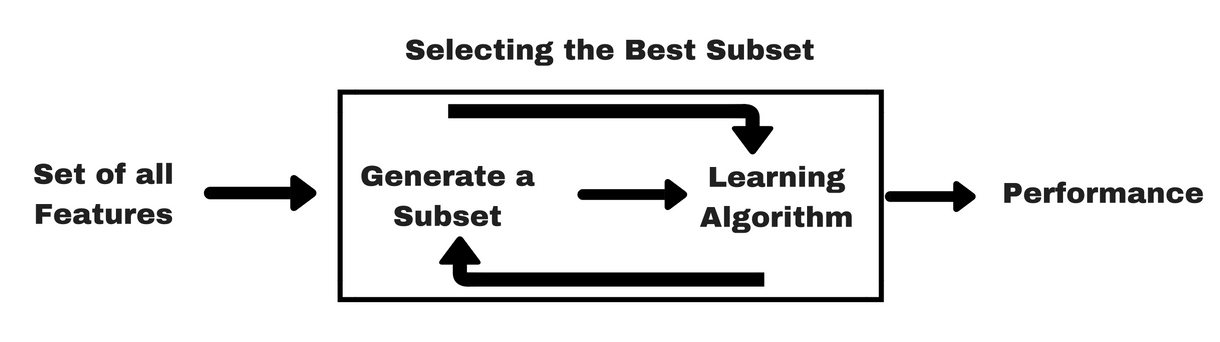



### Forward Selection
Linear model designed by forward selection : an iterative method in which we start having no feature in the model and we keep adding the feature which best improves our model untill an addition of a new variable does not improve the performance of the model.



**Pseudo-code** :

selected variables S = NULL

remaining variables R = ALL

score = 0

newScore = Inf

**while** R not empty **AND** newScore > score do
   
   score = newScore
    
   ListR2Score = NULL
    
    **loop** on every variable r in R
    
       newS <- S + r
        
       compute a regression between newS and Y
        
       r2Score = R2Score(newS,Y)
        
       add r2Score to ListR2Score
        
        
   newVar = argmax(ListR2Score)
    
   S <- S + newVar
    
   newScore = R2Score(S,Y)
    

In [67]:
import statsmodels.formula.api as smf

def forward_selected(data, response, Labels, label_response='response'):
    """
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
           
    remaining
    """
    
    try:
        remaining = set(data.columns)
        data = pd.concat([data,response],axis=1)
        remaining = set(data.columns)
    except:
        data = pd.DataFrame(data,columns = ['a'+str(i) for i in range(data.shape[1])])
        response = pd.DataFrame(response,columns=[label_response])
        data = pd.concat([data,response],axis=1)
        remaining = set(data.columns)
    remaining.remove(label_response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            ## linear regression formula in pandas dataframe
            formula = "{} ~ {} + 1".format(label_response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        ## select the candidate that gets the best R2 score an add it in the subset selected
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(label_response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    selected = [Labels[int(col[1:])] for col in selected]
    return selected

In [68]:
ListSelectedFeatures = forward_selected(X_train2, Y_train, Labels)
print("List of Selected Features by forward selection :")
print(ListSelectedFeatures)

KeyboardInterrupt: 

In [ ]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListSelectedFeatures,Labels);

### Backward Elimination

We start with all the features and remove the least significant feature at each iteration which improves the performance model; repeat it until no improvement is observed on removal of features.


**Pseudo-code** :

selected variables S = ALL

remaining variables R = ALL

score = R2Score(S,Y)

newScore = Inf

**while** R not empty **AND** newScore > score do
   
   score = newScore
    
   ListR2Score = NULL
    
    **loop** on every variable r in R
    
       newS <- S - r
        
       compute a regression between newS and Y
        
       r2Score = R2Score(newS,Y)
        
       add r2Score to ListR2Score
        
       
        
   newVar = argmax(ListR2Score)
    
   S <- S - newVar
    
   newScore = R2Score(S,Y)

**Exercice**
Complete the backward_selected function, using the forward_selected function.
You have to eliminate the worst_candidate iteratively.

In [71]:
import statsmodels.formula.api as smf

def backward_selected(data, response, Labels, label_response='response'):
    """
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward elimination
           evaluated by adjusted R-squared
    
    remaining
    """
    
    try:
        remaining = set(data.columns)
        data = pd.concat([data,response],axis=1)
        remaining = set(data.columns)
    except:
        data = pd.DataFrame(data,columns = ['a'+str(i) for i in range(data.shape[1])])
        response = pd.DataFrame(response,columns=[label_response])
        data = pd.concat([data,response],axis=1)
        remaining = set(data.columns)
    remaining.remove(label_response)
    selected = remaining
    formula = "{} ~ {} + 1".format(label_response,
                                           ' + '.join(list(selected)))
    score = smf.ols(formula, data).fit().rsquared_adj
    current_score, best_new_score = score, score
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in selected:
            selectLoc = list(selected - set([candidate]))
            ## linear regression formula in pandas dataframe
            formula = "{} ~ {} + 1".format(label_response,
                                           ' + '.join(selectLoc))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, worse_candidate = scores_with_candidates.pop()
        ## select the candidate that gets the best R2 score an add it in the subset selected
        if current_score < best_new_score:
            ############################ START YOUR CODE HERE (3 lines) ############################
            selected.remove(worse_candidate)
            remaining = selected
            current_score = best_new_score
            ############################ END OF THE CODE ############################
    formula = "{} ~ {} + 1".format(label_response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    selected = [Labels[int(col[1:])] for col in selected]
    return selected

In [72]:
ListSelectedFeatures = backward_selected(X_train2, Y_train, Labels)
print("List of Selected Features by backward elimination :")
print(ListSelectedFeatures)

KeyboardInterrupt: 

In [ ]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListSelectedFeatures,Labels);

### Recursive Feature Elimination

A greedy optimization algorithm. It recursively removes attributes and builds a model on those attributes that remain. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration, and then constructs the next model with the left features until all the features are exhausted.

In [73]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

In [74]:
# Example on Classic RFE : RandomForest Classifier
tf = RFE(RandomForestClassifier(), n_features_to_select=50, verbose=0)
tf.fit(X_train2, Y_train)
ListRFESelectedFeatures = [Labels[i] for i in range(len(Labels)) if tf.support_[i] == True]

print("List of Selected Features by classic RFE :")
print(ListRFESelectedFeatures)

List of Selected Features by classic RFE :
['Product_Info_3', 'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_3', 'InsuredInfo_6', 'Insurance_History_1', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_4', 'Medical_History_8', 'Medical_History_9', 'Medical_History_13', 'Medical_History_15', 'Medical_History_16', 'Medical_History_18', 'Medical_History_23', 'Medical_History_24', 'Medical_History_26', 'Medical_History_28', 'Medical_History_29', 'Medical_History_34', 'Medical_History_36', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41', 'Medical_Keyword_3', 'Medical_Keyword_15', 'Medical_Keyword_23', 'Product_Info_2_D1', 'Product_Inf

In [75]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListRFESelectedFeatures,Labels);

MSE= 0.202
R2= -0.101201508973


**RFECV** uses cross-validation to find the best features, considering the learning algorithm that is used. This way, the parameter **n_features_to_select** in the RFE function in scikit-learn is not useful anymore.

#### Exercice :
Try to implement the *RFE under cross-validation* on a random forest of 100 estimators, using the library *RFECV*. Extract and print the best features on a 5-fold stratified cross-validation. Be sure to use scikit-learn documentation.

In [108]:
def RFECVModel(X_train,Y_train):
    """
    RFE using cross validation
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    rfecv -- trained rfecv model on 100 estimators and a 5-fold stratifiedkfold
    
    """
    ########################## START YOUR CODE HERE ##########################
    from sklearn.model_selection import StratifiedKFold
    
    rf = RandomForestClassifier(n_estimators=100)
    cv = StratifiedKFold(n_splits=5)
    
    rfecv = RFECV(rf, step=1, cv=cv, n_jobs=-1)
    rfecv.fit(X_train, Y_train)
    ########################## END OF YOUR CODE ##########################
    return rfecv

In [109]:
rfecv = RFECVModel(X_train2,Y_train)
print(rfecv)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
   n_jobs=-1, scoring=None, step=1, verbose=0)


#### Expected output :
RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [110]:
ListRFECVSelectedFeatures = [Labels[i] for i in range(len(Labels[:100])) if rfecv.support_[i] == True]

In [112]:
print(ListRFECVSelectedFeatures)

['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_15', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 

In [111]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListRFECVSelectedFeatures,Labels);

MSE= 0.196
R2= -0.0684925532611


## 2.3 Embedded Methods

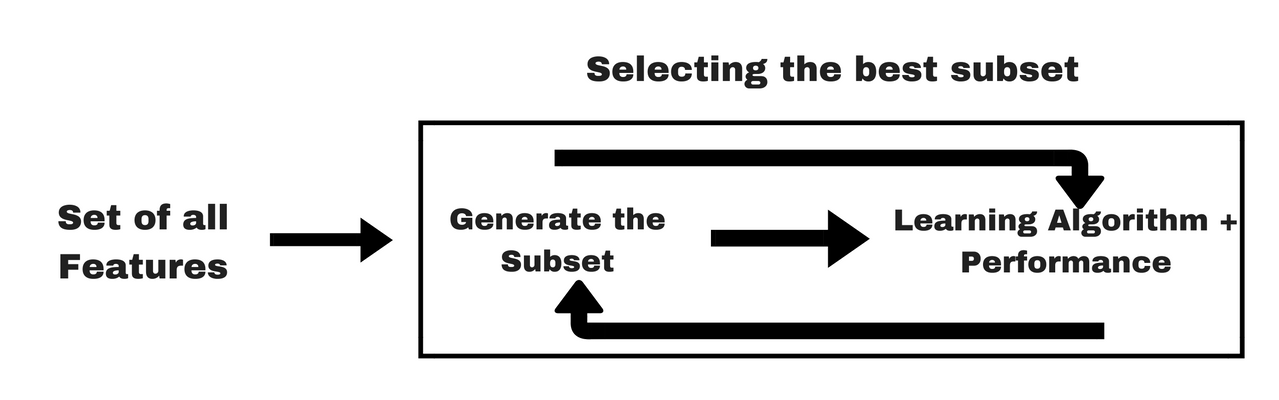

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

### Features selection using L1 Penality

Linear selection process using the features contribution in the regression or classification.
For classification, we are interested in a risk minimization for the equation :

$$ \sum\limits_{i=1,n}\mathcal{L}(f(x_{i}),y_{i})+\Omega(w) $$

$$ \sum\limits_{i=1,n}\mathcal{L}(f(x_{i}),y_{i})+\lambda||w||_{1} $$


where
- $\mathcal{L}$ is a loss function of our samples and our model parameters.
- $\Omega$ is a penalty function.

The model consistency, in terms of finding the right set of non-zero parameters as well as their signs, can be achieved by scaling C1. That is why it is very useful to get the non-zero parameters, and doing so, the best variables.

In [113]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Automatically created module for IPython interactive environment


We van use the **SelectFromModel** library from scikit-learn that transforms the training features, according to the importance weights generated by the **L1-penalty**.

#### Using SVM Algorithm
We optimize on the *threshold* variable to get optimal threshold for feature importance.

In [117]:
## Initialize a SVC model with L1 penalty
alg = LinearSVC(penalty='l1',dual=False)

## List of parameters for the grid search to select the best threshold in SelectFromModel.
## We want a exponential scale between 0 and 0.5 for the threshold grid. 
thresholds = np.arange(1e-5,0.5,0.5/20)
r0 = np.log(thresholds[0]) / np.log(10)
r1 = np.log(thresholds[-1]) / np.log(10)
thresholds = 10 ** (np.arange(r0,r1,(r1-r0)/20))
parameters = {'modelTransform__threshold':['median','mean'] + thresholds.tolist()}

## The SelectFromModel algorithm : we try on one threshold to make sure our parameter grid is well scaled.
model = SelectFromModel(alg,threshold = thresholds[5]).fit(X_train2, Y_train)
X_New = model.transform(X_train2)
if X_New.shape[1] == 0:
    ## Here, the function has removed all the features. Only a threshold close to zero is available. So no grid search in fact
    parameters = {'modelTransform__threshold':[0]}
    model = SelectFromModel(alg).fit(X_train2, Y_train)
else:
    ## There, we know for sure that our scale is well fitted.
    parameters = {'modelTransform__threshold':thresholds[:6]}
    model = SelectFromModel(alg).fit(X_train2, Y_train)

## Put the two models in a pipeline
estPipe = Pipeline(steps=[('modelTransform',model),('alg',alg)])

## GridSearch to find modelTransform__threshold
clfLog = GridSearchCV(cv=5,estimator=estPipe,param_grid=parameters,n_jobs=-2)
clfLog.fit(X_train2,Y_train);

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('modelTransform', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        prefit=False, threshold...ax_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'modelTransform__threshold': array([  1.00000e-05,   1.71331e-05,   2.93542e-05,   5.02928e-05,
         8.61669e-05,   1.47630e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [118]:
print(clfLog.best_params_)

{'modelTransform__threshold': 5.0292753411387509e-05}


Now that we have the best parameter, we can estimate the best variables using *SelectFromModel*

In [119]:
model = SelectFromModel(alg, threshold = clfLog.best_params_['modelTransform__threshold']).fit(X_train2, Y_train)
Xt_train = model.fit(X_train2,Y_train)

ListSelectedFeaturesLoc = [Labels[i] for i in range(len(model.get_support())) if model.get_support()[i] == True]

In [120]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListSelectedFeaturesLoc,Labels);

MSE= 0.19
R2= -0.035783597549


#### Using Logistic Regression
We optimize on the *threshold* variable to get optimal threshold for feature importance.

In [121]:
def GridSearchThresholdSelectFromModel(alg,X_train,Y_train):
    """
    Grid Search function to select the best threshold for the SelectFromModel function
    
    Arguments:
    alg -- the learning algorithm
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    algThresOpt -- best threshold to select the variables according to their importances
    
    """
    
    ## List of parameters for the grid search to select the best threshold in SelectFromModel.
    ## We want a exponential scale between 0 and 0.5 for the threshold grid. 
    thresholds = np.arange(1e-5,0.5,0.5/20)
    r0 = np.log(thresholds[0]) / np.log(10)
    r1 = np.log(thresholds[-1]) / np.log(10)
    thresholds = 10 ** (np.arange(r0,r1,(r1-r0)/20))
    parameters = {'modelTransform__threshold':['median','mean'] + thresholds.tolist()}

    
    ## The SelectFromModel algorithm : we try on one threshold to make sure our parameter grid is well scaled.
    model = SelectFromModel(alg,threshold = thresholds[5]).fit(X_train, Y_train)
    X_New = model.transform(X_train)
    if X_New.shape[1] == 0:
        ## Here, the function has removed all the features. Only a threshold close to zero is available. So no grid search in fact
        parameters = {'modelTransform__threshold':[0]}
        model = SelectFromModel(alg).fit(X_train, Y_train)
    else:
        ## There, we know for sure that our scale is well fitted.
        parameters = {'modelTransform__threshold':thresholds[:6]}
        model = SelectFromModel(alg).fit(X_train, Y_train)

    ## Put the two models in a pipeline
    estPipe = Pipeline(steps=[('modelTransform',model),('alg',alg)])

    ## GridSearch to find modelTransform__threshold
    clfLog = GridSearchCV(cv=5,estimator=estPipe,param_grid=parameters,n_jobs=-2)
    clfLog.fit(X_train,Y_train);
    
    algThresOpt = clfLog.best_params_['modelTransform__threshold']
    return algThresOpt

** Exercice ** :
Complete the function below to get the best features, using the function SelectFromModel in sklearn

In [144]:
def EmbeddedFeatSelectionModel(alg,X_train,Y_train,Labels):
    
    ###### START YOUR CODE HERE (2 lines approximately) ######
    from sklearn.feature_selection import SelectFromModel
    
    model = SelectFromModel(alg, threshold=GridSearchThresholdSelectFromModel(alg, X_train, Y_train))
    model.fit(X_train, Y_train)
    ###### END OF THE CODE ######
    
    ListSelectedFeatures = [Labels[i] for i in range(len(model.get_support())) if model.get_support()[i] == True]
    return ListSelectedFeatures

Let's try the code :

In [145]:
## Example :
LabelsRand = range(50)
matRand_Train = np.array([[1.0] * 30 + [0.0] * 20] * 50 + [[1.0] * 30 + [0.0] * 20] * 50)
yRand_Train = np.array([1] * 50 + [0] * 50)
matRand_Test = np.array([[0.0] * 25 + [1.0] * 25] * 40)
yRand_Test = np.array([0] * 20 + [0] * 20)


alg = LogisticRegression(penalty="l1", dual=False)
ListSelectedFeaturesDummy = EmbeddedFeatSelectionModel(alg,matRand_Train,yRand_Train,LabelsRand)


print("List of selected features for dummy example : ")
print(ListSelectedFeaturesDummy)

/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


List of selected features for dummy example : 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


**Expected output**
<table> 
    <tn>
    List of selected features for dummy example : 
    </tn>
</table>
<table> 
    <td>
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
    </td>
</table> 


** NOW ON THE REAL DATASET **

In [146]:
alg = LogisticRegression(penalty="l1", dual=False)
ListLogisticEmbeddedSelectedFeatures = EmbeddedFeatSelectionModel(alg,X_train2,Y_train,Labels)

In [147]:
modelfit(X_train2,Y_train,X_test2,Y_test,ListLogisticEmbeddedSelectedFeatures,Labels);

MSE= 0.188
R2= -0.0248806123117


#### Feature selection with RandomForest
Use Feature importance for feature selection

The *feature importance* of each input variable, essentially allowing us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.


In the example below we first train and then evaluate an XGBoost model on the entire training dataset and test datasets respectively.

Using the feature importances calculated from the training dataset, we then wrap the model in a SelectFromModel instance. We use this to select features on the training dataset, train a model from the selected subset of features, then evaluate the model on the testset, subject to the same feature selection scheme.

For interest, we can test multiple thresholds for selecting features by feature importance. Specifically, the feature importance of each input variable, essentially allowing us to test each subset of features by importance, starting with all features and ending with a subset with the most important feature.

In [150]:
from sklearn.metrics import accuracy_score

In [155]:
# fit model on all training data
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train2, Y_train)

# make predictions for test data and evaluate
pred = model.predict(X_test2)
predictions = [round(value) for value in pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)

# generate exponentially scaled thresholds
thresholds = np.arange(thresholds[0],thresholds[-1],(thresholds[-1]-thresholds[0])/20)
r0 = np.log(thresholds[0]) / np.log(10)
r1 = np.log(thresholds[-1]) / np.log(10)
thresholds = 10 ** (np.arange(r0,r1,(r1-r0)/20))

ListAcc = []
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train2)
    # train model
    selection_model = RandomForestClassifier(n_estimators=200)
    selection_model.fit(select_X_train, Y_train)
    # eval model
    select_X_test = selection.transform(X_test2)
    pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    ListAcc.append(accuracy)
idMax = np.argmax(ListAcc)
threshOpt = thresholds[idMax]

selection = SelectFromModel(model, threshold=threshOpt, prefit=True)
select_X_train = selection.transform(X_train2)
print('Optimal number of Features :')
print(select_X_train.shape[1])
# train model
selection_model = RandomForestClassifier(n_estimators=200)
selection_model.fit(select_X_train, Y_train)
# eval model
select_X_test = selection.transform(X_test2)
pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in pred]


print
print("MSE=",mean_squared_error(predictions,Y_test))
print("R2=",r2_score(Y_test,predictions))
print
print(model)

Accuracy: 79.40%
Thresh=0.000, n=143, Accuracy: 80.60%
Thresh=0.000, n=143, Accuracy: 80.80%
Thresh=0.000, n=142, Accuracy: 79.80%
Thresh=0.000, n=141, Accuracy: 80.80%
Thresh=0.000, n=138, Accuracy: 80.20%
Thresh=0.001, n=128, Accuracy: 80.60%
Thresh=0.001, n=121, Accuracy: 80.20%
Thresh=0.001, n=107, Accuracy: 80.40%
Thresh=0.002, n=96, Accuracy: 81.00%
Thresh=0.002, n=81, Accuracy: 79.80%
Thresh=0.003, n=66, Accuracy: 80.00%
Thresh=0.005, n=46, Accuracy: 80.20%
Thresh=0.007, n=29, Accuracy: 79.80%
Thresh=0.009, n=23, Accuracy: 79.40%
Thresh=0.013, n=21, Accuracy: 80.20%
Thresh=0.018, n=19, Accuracy: 79.60%
Thresh=0.025, n=10, Accuracy: 80.60%
Thresh=0.036, n=4, Accuracy: 78.80%
Thresh=0.050, n=2, Accuracy: 70.20%
Thresh=0.070, n=1, Accuracy: 80.40%
Optimal number of Features :
96
MSE= 0.21
R2= -0.144813449923
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split

We can see that the performance of the model generally decreases with the number of selected features.


**Exercice**
Do the same thing with GradientBoostingClassifier in sklearn.

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

# fit model on all training data
model = GradientBoostingClassifier()
model.fit(X_train2, Y_train)

# make predictions for test data and evaluate
pred = model.predict(X_test2)
predictions = [round(value) for value in pred]
accurac2 = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)

# generate exponentially scaled thresholds
thresholds = np.arange(thresholds[0],thresholds[-1],(thresholds[-1]-thresholds[0])/20)
r0 = np.log(thresholds[0]) / np.log(10)
r1 = np.log(thresholds[-1]) / np.log(10)
thresholds = 10 ** (np.arange(r0,r1,(r1-r0)/20))

ListAcc = []
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train2)
    # train model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_X_train, Y_train)
    # eval model
    select_X_test = selection.transform(X_test2)
    pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    ListAcc.append(accuracy)

print(ListAcc)
idMax = np.argmax(ListAcc)
threshOpt = thresholds[idMax]
    
selection = SelectFromModel(model, threshold=threshOpt, prefit=True)
select_X_train = selection.transform(X_train2)
print('Optimal number of Features :')
print(select_X_train.shape[1])

# train model
selection_model = GradientBoostingClassifier(n_estimators=200)
selection_model.fit(select_X_train, Y_train)

# eval model
select_X_test = selection.transform(X_test2)
pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in pred]

# print results
print
print("MSE=",mean_squared_error(predictions,Y_test))
print("R2=",r2_score(Y_test,predictions))
print
print(model)

Accuracy: 80.40%
[]


/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/sandboxadmin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


ValueError: attempt to get argmax of an empty sequence

We choose this last set of features as our final features  !!!!!

In [473]:
## Final selected features :
ListIdFinalFeatures = (selection.get_support() == True).nonzero()[0]
ListFinalFeatures = [Labels[i] for i in range(len(Labels)) if selection.get_support()[i] == True]

X_train_Final = X_train2[:,ListIdFinalFeatures].copy()
X_test_Final = X_test2[:,ListIdFinalFeatures].copy()

X_train_Final = np.append(X_train_Final,np.vstack(Y_train),axis=1)
X_test_Final = np.append(X_test_Final,np.vstack(Y_test),axis=1)

Tab_train = pd.DataFrame(X_train_Final,columns=ListFinalFeatures + [yName])
Tab_test = pd.DataFrame(X_test_Final,columns=ListFinalFeatures + [yName])

Tab_train.to_csv(path + 'trainCourseWed_Sat.csv')
Tab_test.to_csv(path + 'testCourseWed_Sat.csv')